In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy
from pandas import DataFrame
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from sklearn.decomposition import PCA
import math
from numpy import array_split

In [2]:
def partition_df(df: DataFrame, n: int):
    sections = math.ceil(len(df.index) / n)
    split = array_split(df, sections)
    return split

In [3]:
test_group_size = 500

dataset_path = '../resources/document_vectors.pkl'
with open(dataset_path, mode='rb') as f:
    df_all: DataFrame = pickle.load(f)

    df_all.sort_values(by=['video.url', 'published_at'], inplace=True)

    dfs = partition_df(df_all, test_group_size)

In [4]:
%matplotlib notebook

In [63]:
df = dfs[100]
df.drop_duplicates(subset=['message'], inplace=True)
X = numpy.stack(df['document_vector'])

embedded = TSNE(n_components=2, perplexity=2).fit_transform(X)
# embedded = Isomap(n_components=2, n_neighbors=5).fit_transform(X)

xs, ys = zip(*embedded)
messages = df['message'].to_list()

In [6]:
X[0].size

768

<IPython.core.display.Javascript object>


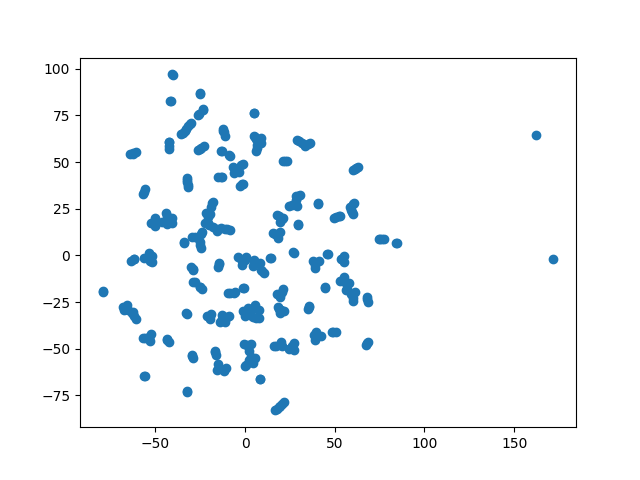

In [64]:
plt.rcParams['font.family'] = 'IPAGothic'

fig,ax = plt.subplots()
sc = plt.scatter(xs,ys)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    indices = " ".join(list(map(str,ind["ind"])))
    labels = " ".join([messages[n] for n in ind["ind"]])
    text = f"{indices}, {labels}"
    annot.set_text(text)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [65]:
messages[88]

'ハイチュウかあ'

In [66]:
messages[124]

'にゃあああん'

In [55]:
messages[225]

'落ち着いてw'

In [56]:
messages[227]

'トップなのに焦るから'

In [12]:
messages[100]

'る～るるる～'

In [13]:
messages[434]

'GALSシールド'

In [14]:
messages[307]

'るーるるるー、にじさんじランドVS森中ランド'

In [15]:
messages[359]

'再起動必要'

In [16]:
import matplotlib

In [17]:
print(matplotlib.matplotlib_fname())

/home/ogino/.local/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
